# Hoja de Trabajo 1: Experimentación con Redes Neuronales

## Introducción
Este ejercicio tiene como objetivo profundizar en la comprensión de las redes neuronales mediante la experimentación. A través de variaciones en la arquitectura y parámetros, se busca entender cómo se comporta y aprende una red neuronal. Utilizaremos el dataset "Heart Disease" disponible en el UCI Machine Learning Repository.

## Dataset "Heart Disease"
Puedes descargar el dataset directamente desde el siguiente enlace:
http://archive.ics.uci.edu/dataset/45/heart+disease. Recuerda que vamos a estar utilizando CRISP-DM para crear los modelos. El primer paso es comprender los datos. Ese link te proporciona la información necesaria para entender el dataset. Las columnas y el rol que cada columna va a jugar en tu modelo (variables independientes y dependiente). Como menciona la documentación, utiliza solo la base de datos de Cleveland.

## Sección 1: Preparación de Datos
* Descarga y carga el dataset "Heart Disease".
* Realiza un breve análisis exploratorio: ¿Qué tipo de datos contiene? ¿Cuántos ejemplos hay?. 
* Procesa el dataset: normaliza o estandariza si es necesario, divide el dataset en conjuntos de entrenamiento y prueba.

Nuestro enfoque de hoy no es un mega modelo sino comprender mejor como se comportan las redes neuronales. Realiza lo necesario pero nada muy extravagante.

In [23]:
#Dependencies
import tensorflow as tf
import tensorflow.keras as kr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import logging

In [35]:
#Cargamos el dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

df = pd.read_csv(url, header=None, names=column_names)

print(df.head())



    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [4]:
#revisamos que todas las columnas tengan valores númericos.
def revisar_valores_numericos(df):
    for columna in df.columns:
        valores_no_numericos = df[columna][pd.to_numeric(df[columna], errors='coerce').isnull()]
        if not valores_no_numericos.empty:
            print(f"Valores no numéricos en la columna '{columna}':")
            print(valores_no_numericos)

revisar_valores_numericos(df)


Valores no numéricos en la columna 'ca':
166    ?
192    ?
287    ?
302    ?
Name: ca, dtype: object
Valores no numéricos en la columna 'thal':
87     ?
266    ?
Name: thal, dtype: object


In [5]:
#Eliminamos filas con el simbolo ? 
df = df[df['ca'] != '?']
df = df[df['thal'] != '?']

In [6]:
#Número de ejemplos y caracteristicas
print(df.shape)  

(297, 14)


In [10]:
#Estadísticas descriptivas para las columnas numéricas
print(df.describe())  


              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000  
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.946128  
std      0.994914   22.941562 

In [11]:
#Tipos de datos 
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  target    297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB
None


<AxesSubplot:xlabel='target', ylabel='count'>

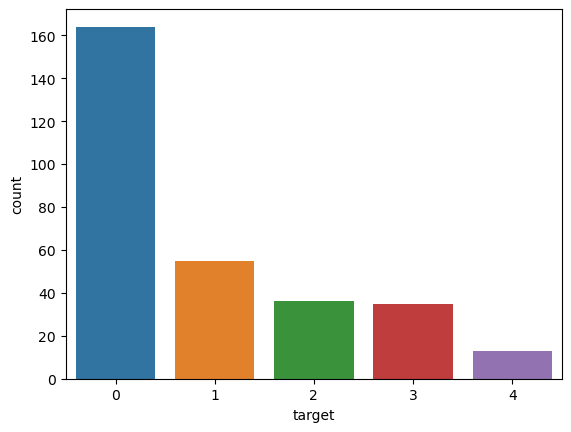

In [36]:
#Visual de la variable objetivo 

sns.countplot(x='target', data=df) 
#Podemos observar un desbalanceo en los datos. 


In [15]:
# Calcular la cantidad de valores nulos por columna
conteo_nulos = df.isnull().sum()

total_filas = df.shape[0]
porcentaje_nulos = (conteo_nulos / total_filas) * 100

info_nulos = pd.DataFrame({
    'Columna': conteo_nulos.index,
    'Valores Nulos': conteo_nulos.values,
    'Porcentaje de Nulos': porcentaje_nulos.values
})

print(info_nulos)


     Columna  Valores Nulos  Porcentaje de Nulos
0        age              0                  0.0
1        sex              0                  0.0
2         cp              0                  0.0
3   trestbps              0                  0.0
4       chol              0                  0.0
5        fbs              0                  0.0
6    restecg              0                  0.0
7    thalach              0                  0.0
8      exang              0                  0.0
9    oldpeak              0                  0.0
10     slope              0                  0.0
11        ca              0                  0.0
12      thal              0                  0.0
13    target              0                  0.0


In [30]:
# Eliminar filas con el símbolo "?" en las columnas "ca" y "thal"
df = df[df['ca'] != '?']
df = df[df['thal'] != '?']

# Convertir las columnas "ca" y "thal" a valores numéricos
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])

# Dividimos las columnas del dataset en variables independientes (X) y dependientes (Y)
X = df.iloc[:, 0:13].values
Y = df.iloc[:, 13].values

# Aplicar SMOTE para balancear las clases
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=1)


<AxesSubplot:ylabel='count'>

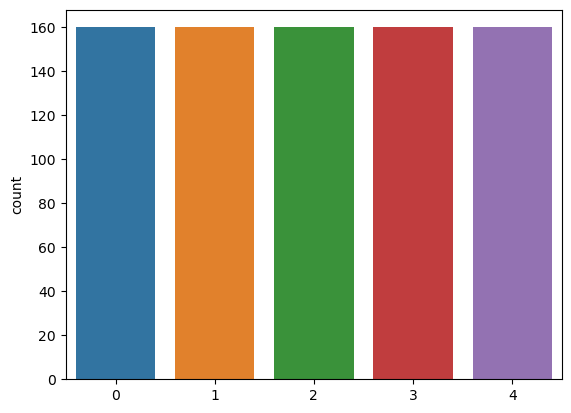

In [31]:

# Crear una serie de pandas con los datos balanceados
y_resampled_series = pd.Series(y_resampled)

# Utilizar Seaborn para crear un gráfico de barras
sns.countplot(x=y_resampled_series)


In [32]:
# Codificamos las clases como números enteros
encoder = LabelEncoder()
encoder.fit(y_resampled) # Utiliza y_resampled en lugar de Y
encoded_Y = encoder.transform(y_resampled) # Utiliza y_resampled en lugar de Y
# Convertimos los enteros en variables dummy (one hot encoding)
dummy_y = kr.utils.to_categorical(encoded_Y)
# Dividimos el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, dummy_y, test_size=0.20, random_state=1) # Utiliza X_resampled en lugar de X


## Sección 2: Construcción de la Red Neuronal

Construye una red neuronal básica utilizando Keras.

* Define la arquitectura: número de capas, neuronas por capa, función de activación.
* Compila el modelo especificando la función de pérdida, el optimizador y métricas adicionales.
* Realiza una breve descripción escrita de la arquitectura que has definido.

In [20]:
model = tf.keras.models.Sequential() #Definimos el modelo
model.add(kr.layers.Dense(8, input_dim=13, activation='relu'))#Agregamos capa densa con 8 neuronas. 
model.add(kr.layers.Dense(5, activation='softmax'))#Agregamos capa de salida
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#Compilamos el modelo
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')

In [33]:
# Conclusiones
print("Descripción:")
print("La primera capa densa tiene 8 neuronas y utiliza la función de activación ReLU ")
print("La dimensión de entrada es 13, lo que significa que esta capa acepta datos con 13 características.")
print("La segunda capa es la capa de salida y tiene 5 neuronas con una función de activación softmax")
print("el modelo utilizando la función de pérdida de entropía cruzada categórica, que es adecuada para problemas de clasificación multiclase")


Descripción:
La primera capa densa tiene 8 neuronas y utiliza la función de activación ReLU 
La dimensión de entrada es 13, lo que significa que esta capa acepta datos con 13 características.
La segunda capa es la capa de salida y tiene 5 neuronas con una función de activación softmax
el modelo utilizando la función de pérdida de entropía cruzada categórica, que es adecuada para problemas de clasificación multiclase


## Sección 3: Experimentación

Utiliza ciclos para las siguientes pruebas. Debes entrenar varios modelos variando el parámetro indicado en cada inciso según el rango y paso proporcionado. Recuerda almacenar tus resultados porque te servirán en la siguiente sección.

### Variabilidad en Capas Ocultas:

Las redes con demasiadas capas pueden tardar mucho tiempo en entrenarse, especialmente si no se dispone de un hardware adecuado.

* Rango: Entre 1 y 10 capas.
* Paso: 1 capa.
* Nota: En muchos problemas, incluso 2-3 capas son suficientes para obtener buenos resultados. Por encima de eso, a veces se necesita una arquitectura especializada o un problema muy complejo para justificar más capas.

In [40]:
logging.getLogger('tensorflow').setLevel(logging.ERROR)
# Definir una función para construir y entrenar el modelo
def entrenar_modelo(num_capas_ocultas):
    model = tf.keras.models.Sequential()
    model.add(kr.layers.Dense(8, input_dim=13, activation='relu'))
    
    # Agregar capas ocultas
    for _ in range(num_capas_ocultas):
        model.add(kr.layers.Dense(8, activation='relu'))
    
    model.add(kr.layers.Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Evaluar el modelo en el conjunto de prueba
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    return accuracy, loss

# Almacenar los resultados
resultados = []

# Iterar a través del rango de capas ocultas y entrenar el modelo
for num_capas in range(1, 11):
    accuracy, loss = entrenar_modelo(num_capas)
    resultados.append((num_capas, accuracy, loss))
    print(f"Número de Capas Ocultas: {num_capas}, Precisión: {accuracy}, Pérdida: {loss}")

resultados_df = pd.DataFrame(resultados, columns=['Número de Capas Ocultas', 'Precisión', 'Pérdida'])



Número de Capas Ocultas: 1, Precisión: 0.18125000596046448, Pérdida: 4.389388084411621
Número de Capas Ocultas: 2, Precisión: 0.35624998807907104, Pérdida: 1.4411401748657227
Número de Capas Ocultas: 3, Precisión: 0.25, Pérdida: 1.5869290828704834
Número de Capas Ocultas: 4, Precisión: 0.28125, Pérdida: 1.6045334339141846
Número de Capas Ocultas: 5, Precisión: 0.19374999403953552, Pérdida: 1.6084940433502197
Número de Capas Ocultas: 6, Precisión: 0.2562499940395355, Pérdida: 1.606361985206604
Número de Capas Ocultas: 7, Precisión: 0.1875, Pérdida: 1.586901307106018
Número de Capas Ocultas: 8, Precisión: 0.39375001192092896, Pérdida: 1.4670768976211548
Número de Capas Ocultas: 9, Precisión: 0.16249999403953552, Pérdida: 1.614202857017517
Número de Capas Ocultas: 10, Precisión: 0.19374999403953552, Pérdida: 1.6155366897583008


### Variabilidad en Neuronas:

El número de neuronas por capa influye en la capacidad de la red. Sin embargo, demasiadas neuronas pueden hacer que el entrenamiento sea más lento y puede causar sobreajuste.

* Rango: Entre 10 y 1000 neuronas.
* Paso: Incremento logarítmico

In [42]:
# Rango logarítmico de neuronas
neuronas_rango = np.logspace(1, 3, num=10, dtype=int) # 10 valores entre 10 y 1000

# Almacenar resultados
resultados = []

# Bucle a través del rango de neuronas
for neuronas in neuronas_rango:
    # Crear modelo
    model = tf.keras.models.Sequential()
    model.add(kr.layers.Dense(neuronas, input_dim=13, activation='relu'))
    model.add(kr.layers.Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Entrenar modelo
    model.fit(X_train, y_train, epochs=10, verbose=0) 
    
    # Evaluar modelo
    perdida, precision = model.evaluate(X_test, y_test, verbose=0)
    
    # Almacenar resultado
    resultados.append((neuronas, precision, perdida))
    print(f'Número de Neuronas: {neuronas}, Precisión: {precision}, Pérdida: {perdida}')


resultados_df = pd.DataFrame(resultados, columns=['Número de Neuronas', 'Precisión', 'Pérdida'])



Número de Neuronas: 10, Precisión: 0.19374999403953552, Pérdida: 1.6764404773712158
Número de Neuronas: 16, Precisión: 0.23749999701976776, Pérdida: 5.931576251983643
Número de Neuronas: 27, Precisión: 0.39375001192092896, Pérdida: 2.767885684967041
Número de Neuronas: 46, Precisión: 0.375, Pérdida: 2.3171114921569824
Número de Neuronas: 77, Precisión: 0.2750000059604645, Pérdida: 1.578959345817566
Número de Neuronas: 129, Precisión: 0.3499999940395355, Pérdida: 1.7202732563018799
Número de Neuronas: 215, Precisión: 0.4312500059604645, Pérdida: 1.3113985061645508
Número de Neuronas: 359, Precisión: 0.4312500059604645, Pérdida: 1.7319819927215576
Número de Neuronas: 599, Precisión: 0.44999998807907104, Pérdida: 1.3169324398040771
Número de Neuronas: 1000, Precisión: 0.35624998807907104, Pérdida: 2.1034274101257324


### Variabilidad en Épocas:

Demasiadas épocas sin una técnica de parada temprana pueden llevar al sobreajuste.

* Rango: Entre 10 y 5000 épocas.
* Paso: Incremento logarítmico

In [44]:
# Rango logarítmico de épocas
epocas_rango = np.logspace(1, 3.7, num=10, dtype=int) # 10 valores entre 10 y 5000

# Almacenar resultados
resultados = []

# Bucle a través del rango de épocas
for epocas in epocas_rango:
    # Crear modelo
    model = tf.keras.models.Sequential()
    model.add(kr.layers.Dense(64, input_dim=13, activation='relu'))
    model.add(kr.layers.Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Entrenar modelo
    model.fit(X_train, y_train, epochs=epocas, verbose=0) 
    
    # Evaluar modelo
    loss, precision = model.evaluate(X_test, y_test, verbose=0)
    
    # Almacenar resultado
    resultados.append((epocas, precision, loss))
    print(f'Número de Épocas: {epocas}, Precisión: {precision}, Pérdida: {loss}')

resultados_df = pd.DataFrame(resultados, columns=['Número de Épocas', 'Precisión', 'Pérdida'])



Número de Épocas: 10, Precisión: 0.4000000059604645, Pérdida: 2.170349359512329
Número de Épocas: 19, Precisión: 0.3687500059604645, Pérdida: 1.520613431930542
Número de Épocas: 39, Precisión: 0.45625001192092896, Pérdida: 1.3076530694961548
Número de Épocas: 79, Precisión: 0.4437499940395355, Pérdida: 1.4038684368133545
Número de Épocas: 158, Precisión: 0.6312500238418579, Pérdida: 0.9896032214164734
Número de Épocas: 316, Precisión: 0.637499988079071, Pérdida: 0.8722038269042969
Número de Épocas: 630, Precisión: 0.6312500238418579, Pérdida: 0.9352412223815918
Número de Épocas: 1258, Precisión: 0.6937500238418579, Pérdida: 0.8133971095085144
Número de Épocas: 2511, Precisión: 0.8187500238418579, Pérdida: 0.7690944671630859
Número de Épocas: 5011, Precisión: 0.8500000238418579, Pérdida: 1.4512046575546265


In [114]:
# Definir la lista de números de épocas a probar (incremento logarítmico)
num_epochs_range = [2 ** i for i in range(4, 13)]  # Desde 16 hasta 4096 épocas

# Crear listas para almacenar los resultados
accuracies = []
losses = []

# Iterar a través de diferentes números de épocas
for num_epochs in num_epochs_range:
    # Crear un nuevo modelo
    model = tf.keras.models.Sequential()
    model.add(kr.layers.Dense(64, input_dim=13, activation='relu'))  # Capa de entrada
    model.add(kr.layers.Dense(5, activation='softmax'))  # Capa de salida
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=1)
    
    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(X_test, y_test), verbose=0)
    
    # Evaluar el modelo en el conjunto de prueba
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # Almacenar los resultados
    accuracies.append(accuracy)
    losses.append(loss)

for num_epochs, acc, loss in zip(num_epochs_range, accuracies, losses):
    print(f'Número de épocas: {num_epochs}, Precisión: {acc:.4f}, Pérdida: {loss:.4f}')


Número de épocas: 16, Precisión: 0.4167, Pérdida: 1.4454
Número de épocas: 32, Precisión: 0.5000, Pérdida: 1.6539
Número de épocas: 64, Precisión: 0.5333, Pérdida: 1.3555
Número de épocas: 128, Precisión: 0.5167, Pérdida: 1.7442
Número de épocas: 256, Precisión: 0.4833, Pérdida: 1.4718
Número de épocas: 512, Precisión: 0.4833, Pérdida: 1.7864
Número de épocas: 1024, Precisión: 0.4333, Pérdida: 1.7070
Número de épocas: 2048, Precisión: 0.4333, Pérdida: 3.2968
Número de épocas: 4096, Precisión: 0.4167, Pérdida: 6.5586


## Tamaño de Batch:

El tamaño del batch influye en la velocidad de entrenamiento y la estabilidad del modelo. Un batch muy grande puede no caber en la memoria, mientras que uno muy pequeño puede hacer que el entrenamiento sea inestable.

* Rango: Entre 1 (Stochastic Gradient Descent) y el tamaño del conjunto de datos (Batch Gradient Descent).
* Paso: Incremento logarítmico

In [46]:
# Rango logarítmico de tamaños de batch
batch_sizes = [2 ** i for i in range(0, int(np.log2(X_train.shape[0])) + 1)]

# Almacenar resultados
resultados = []

# Bucle a través del rango de tamaños de batch
for batch_size in batch_sizes:
    # Crear modelo
    model = tf.keras.models.Sequential()
    model.add(kr.layers.Dense(64, input_dim=13, activation='relu'))
    model.add(kr.layers.Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Entrenar modelo
    model.fit(X_train, y_train, epochs=150, batch_size=batch_size, verbose=0)
    
    # Evaluar modelo
    loss, precision = model.evaluate(X_test, y_test, verbose=0)
    
    # Almacenar resultado
    resultados.append((batch_size, precision, loss))
    print(f'Tamaño de Batch: {batch_size}, Precisión: {precision}, Pérdida: {loss}')

resultados_df = pd.DataFrame(resultados, columns=['Tamaño de Batch', 'Precisión', 'Pérdida'])



Tamaño de Batch: 1, Precisión: 0.6937500238418579, Pérdida: 0.8157377243041992
Tamaño de Batch: 2, Precisión: 0.675000011920929, Pérdida: 0.9312669038772583
Tamaño de Batch: 4, Precisión: 0.518750011920929, Pérdida: 1.1783359050750732
Tamaño de Batch: 8, Precisión: 0.6000000238418579, Pérdida: 1.0706473588943481
Tamaño de Batch: 16, Precisión: 0.6937500238418579, Pérdida: 0.7457526326179504
Tamaño de Batch: 32, Precisión: 0.637499988079071, Pérdida: 0.9570913314819336
Tamaño de Batch: 64, Precisión: 0.5375000238418579, Pérdida: 1.0684632062911987
Tamaño de Batch: 128, Precisión: 0.5687500238418579, Pérdida: 1.0975745916366577
Tamaño de Batch: 256, Precisión: 0.5062500238418579, Pérdida: 1.159838080406189
Tamaño de Batch: 512, Precisión: 0.4375, Pérdida: 1.2596333026885986


## Sección 4: Análisis y Reflexión

Con los datos recopilados de las pruebas anteriores, genera gráficos que permitan comparar y analizar el rendimiento del modelo. Te recomendamos utilizar librerías como matplotlib o seaborn para esta tarea. Luego de cada gráfico debes incluir un conclusión de lo que has aprendido con la experimentación y los gráficos.

### Variabilidad en Capas Ocultas

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.

* Eje X: Número de capas ocultas.
* Eje Y: Precisión y pérdida.

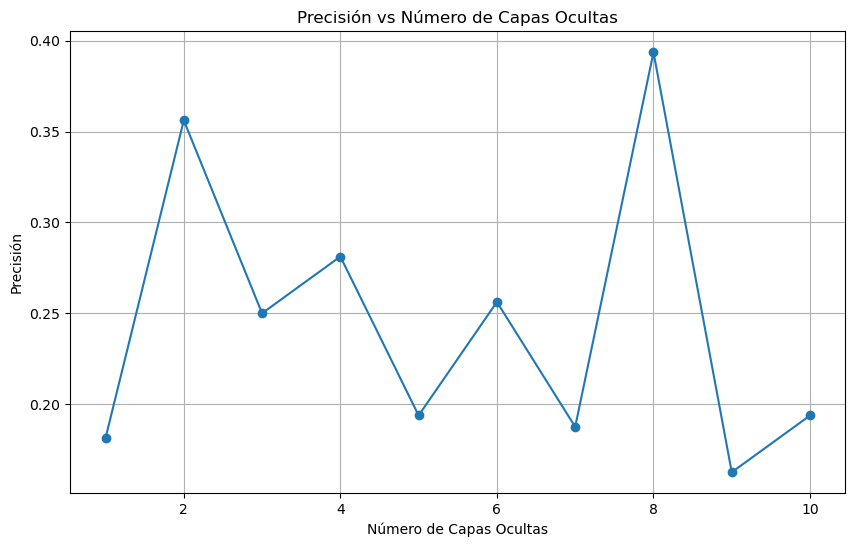

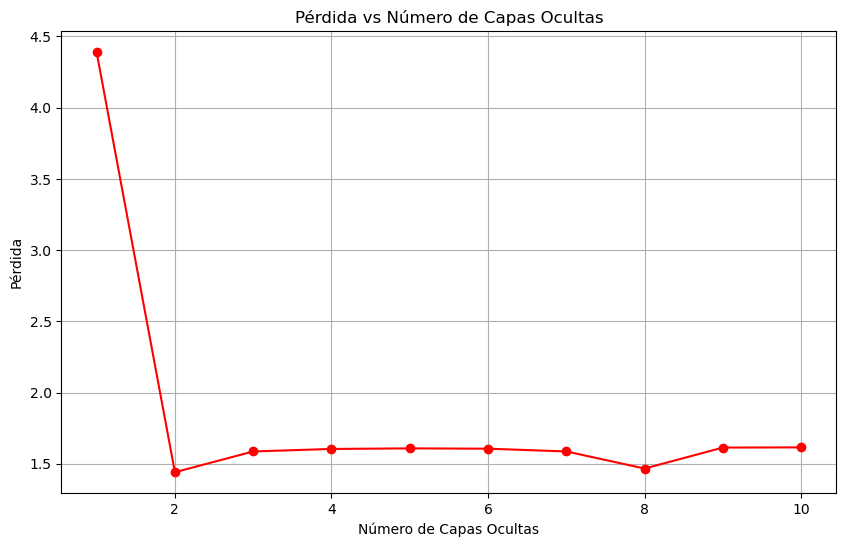

In [41]:
import matplotlib.pyplot as plt

# Gráfico de Precisión vs Número de Capas Ocultas
plt.figure(figsize=(10, 6))
plt.plot(resultados_df['Número de Capas Ocultas'], resultados_df['Precisión'], marker='o')
plt.title('Precisión vs Número de Capas Ocultas')
plt.xlabel('Número de Capas Ocultas')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

# Gráfico de Pérdida vs Número de Capas Ocultas
plt.figure(figsize=(10, 6))
plt.plot(resultados_df['Número de Capas Ocultas'], resultados_df['Pérdida'], marker='o', color='red')
plt.title('Pérdida vs Número de Capas Ocultas')
plt.xlabel('Número de Capas Ocultas')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()



In [48]:
print("Conclusión:")
print("Los resultados muestran una variabilidad en la precisión y la pérdida con diferentes números de capas ocultas.")
print("No hay una tendencia clara que indique que aumentar el número de capas ocultas mejora siempre la precisión.")
print("En algunos casos, aumentar las capas ocultas mejora la precisión, pero en otros, la precisión disminuye.")
print("La pérdida también varía, lo que sugiere que la elección del número de capas ocultas debe ser cuidadosamente")
print("ajustada para el problema específico y los datos disponibles. La experimentación y la validación cruzada pueden")
print("ser herramientas útiles para encontrar el número óptimo de capas ocultas para un modelo particular.")



Conclusión:
Los resultados muestran una variabilidad en la precisión y la pérdida con diferentes números de capas ocultas.
No hay una tendencia clara que indique que aumentar el número de capas ocultas mejora siempre la precisión.
En algunos casos, aumentar las capas ocultas mejora la precisión, pero en otros, la precisión disminuye.
La pérdida también varía, lo que sugiere que la elección del número de capas ocultas debe ser cuidadosamente
ajustada para el problema específico y los datos disponibles. La experimentación y la validación cruzada pueden
ser herramientas útiles para encontrar el número óptimo de capas ocultas para un modelo particular.


### Variabilidad en Neuronas

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.

* Eje X: Número de neuronas.
* Eje Y: Precisión y pérdida.

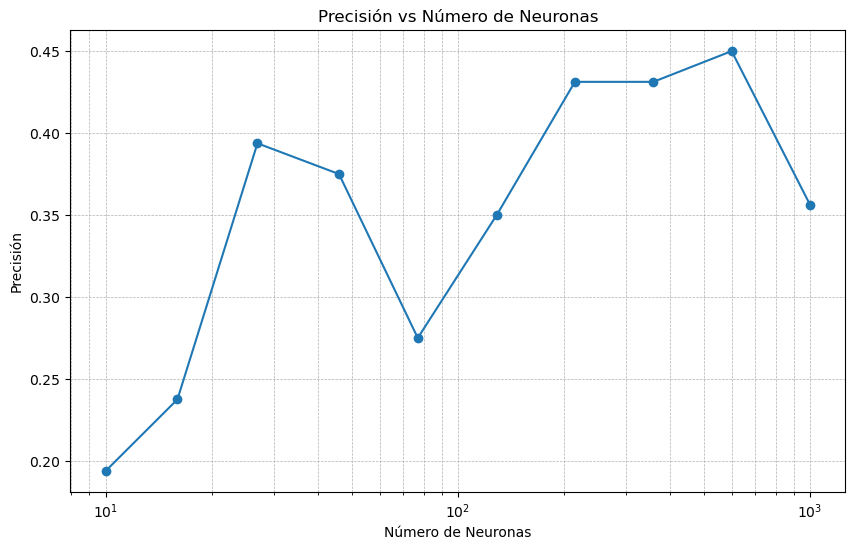

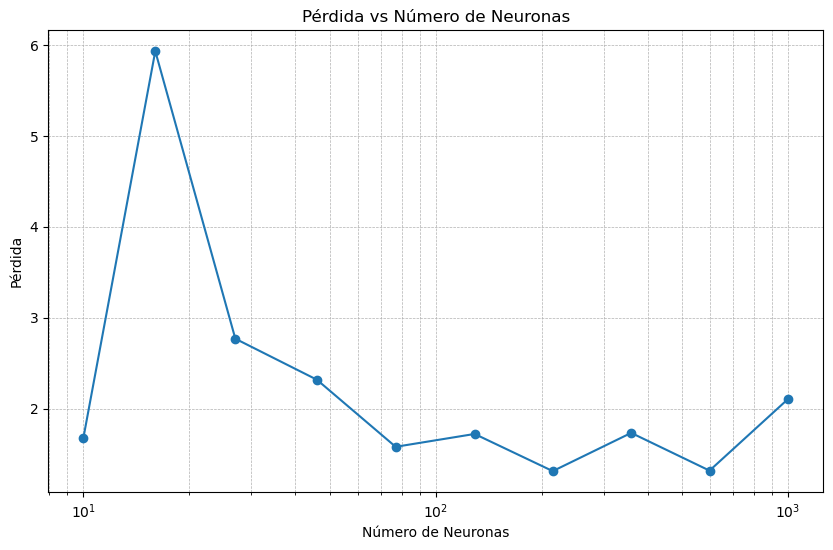

In [43]:
import matplotlib.pyplot as plt

# Gráfico de Precisión vs Número de Neuronas
plt.figure(figsize=(10, 6))
plt.plot(resultados_df['Número de Neuronas'], resultados_df['Precisión'], marker='o')
plt.title('Precisión vs Número de Neuronas')
plt.xlabel('Número de Neuronas')
plt.ylabel('Precisión')
plt.xscale('log') # Escala logarítmica en el eje X
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

# Gráfico de Pérdida vs Número de Neuronas
plt.figure(figsize=(10, 6))
plt.plot(resultados_df['Número de Neuronas'], resultados_df['Pérdida'], marker='o')
plt.title('Pérdida vs Número de Neuronas')
plt.xlabel('Número de Neuronas')
plt.ylabel('Pérdida')
plt.xscale('log') # Escala logarítmica en el eje X
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


In [49]:
print("Conclusión:")
print("Los resultados muestran que la precisión y la pérdida varían significativamente con diferentes números de neuronas.")
print("A medida que aumentamos el número de neuronas, no hay una tendencia clara y consistente en la precisión o la pérdida.")
print("En algunos casos, aumentar las neuronas mejora la precisión, pero en otros, la precisión disminuye o se estabiliza.")
print("La pérdida también muestra una variabilidad similar. Esto sugiere que la selección del número de neuronas debe ser")
print("cuidadosamente ajustada y validada para el problema y los datos específicos. La experimentación y la validación cruzada")
print("pueden ser esenciales para encontrar el número óptimo de neuronas que equilibre la capacidad de ajuste y la generalización.")


Conclusión:
Los resultados muestran que la precisión y la pérdida varían significativamente con diferentes números de neuronas.
A medida que aumentamos el número de neuronas, no hay una tendencia clara y consistente en la precisión o la pérdida.
En algunos casos, aumentar las neuronas mejora la precisión, pero en otros, la precisión disminuye o se estabiliza.
La pérdida también muestra una variabilidad similar. Esto sugiere que la selección del número de neuronas debe ser
cuidadosamente ajustada y validada para el problema y los datos específicos. La experimentación y la validación cruzada
pueden ser esenciales para encontrar el número óptimo de neuronas que equilibre la capacidad de ajuste y la generalización.


### Variabilidad en Épocas

Realiza 1 gráfico

* Eje X: Número de épocas.
* Eje Y: Precisión y pérdida.

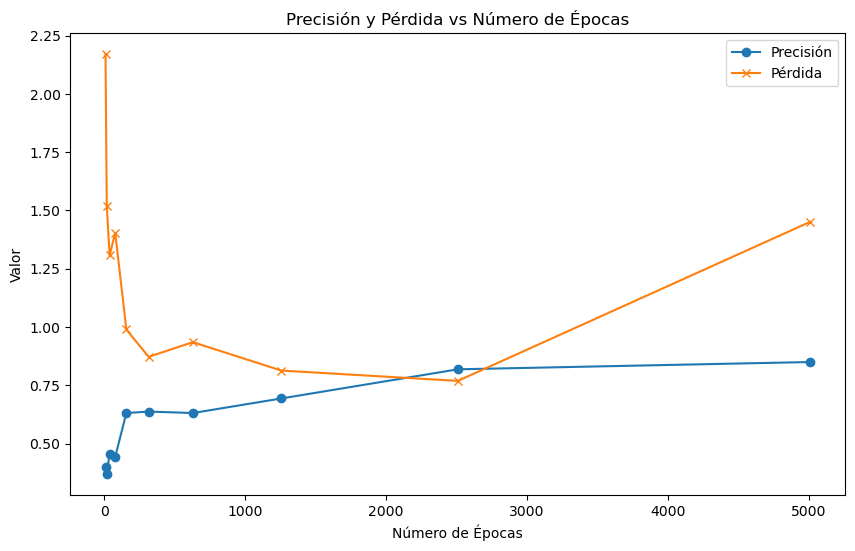

In [45]:
import matplotlib.pyplot as plt

# Extraer los datos del DataFrame
epocas = resultados_df['Número de Épocas']
precision = resultados_df['Precisión']
perdida = resultados_df['Pérdida']

# Crear una figura y un eje
plt.figure(figsize=(10, 6))

# Graficar la precisión
plt.plot(epocas, precision, marker='o', label='Precisión')

# Graficar la pérdida
plt.plot(epocas, perdida, marker='x', label='Pérdida')

# Agregar etiquetas y título
plt.xlabel('Número de Épocas')
plt.ylabel('Valor')
plt.title('Precisión y Pérdida vs Número de Épocas')
plt.legend()

# Mostrar el gráfico
plt.show()


In [50]:
print("Conclusión:")
print("Los resultados revelan que el número de épocas tiene un impacto notable en la precisión y la pérdida del modelo.")
print("Inicialmente, aumentar el número de épocas parece mejorar la precisión, alcanzando un pico y luego disminuyendo.")
print("La pérdida muestra una tendencia similar, disminuyendo inicialmente y luego aumentando, lo que podría indicar sobreajuste.")
print("Esto sugiere que hay un punto óptimo en el número de épocas donde el modelo tiene el mejor rendimiento en los datos de prueba.")
print("Demasiadas épocas pueden llevar al sobreajuste, donde el modelo se ajusta demasiado a los datos de entrenamiento y pierde")
print("la capacidad de generalizar a nuevos datos. La selección cuidadosa del número de épocas, posiblemente con técnicas de parada temprana,")
print("puede ayudar a encontrar el equilibrio adecuado.")



Conclusión:
Los resultados revelan que el número de épocas tiene un impacto notable en la precisión y la pérdida del modelo.
Inicialmente, aumentar el número de épocas parece mejorar la precisión, alcanzando un pico y luego disminuyendo.
La pérdida muestra una tendencia similar, disminuyendo inicialmente y luego aumentando, lo que podría indicar sobreajuste.
Esto sugiere que hay un punto óptimo en el número de épocas donde el modelo tiene el mejor rendimiento en los datos de prueba.
Demasiadas épocas pueden llevar al sobreajuste, donde el modelo se ajusta demasiado a los datos de entrenamiento y pierde
la capacidad de generalizar a nuevos datos. La selección cuidadosa del número de épocas, posiblemente con técnicas de parada temprana,
puede ayudar a encontrar el equilibrio adecuado.


### Tamaño de Batch:

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.
* Eje X: Tamaño del batch.
* Eje Y: Precisión y pérdida.

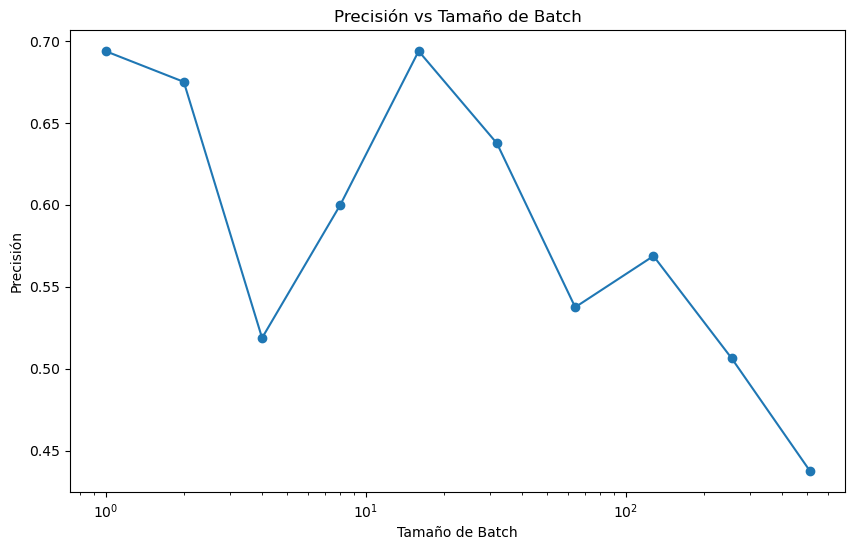

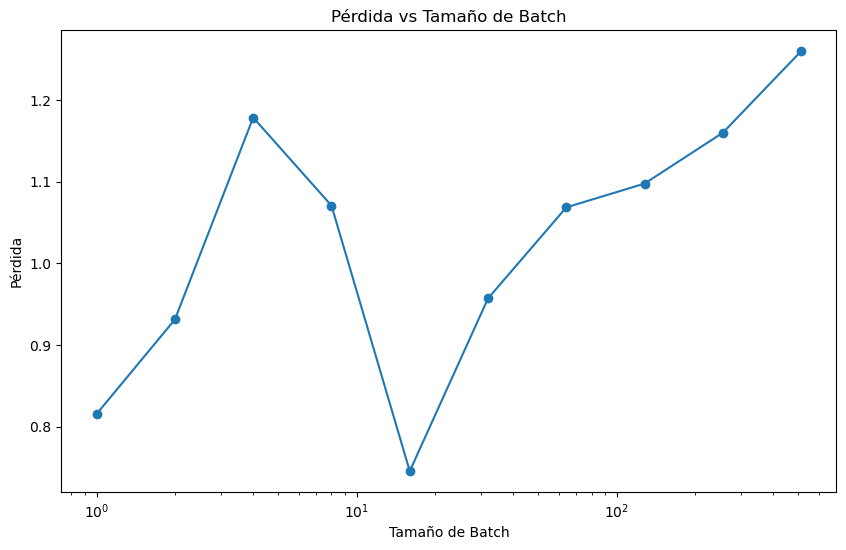

In [47]:
import matplotlib.pyplot as plt

# Gráfico de Precisión vs Tamaño de Batch
plt.figure(figsize=(10, 6))
plt.plot(resultados_df['Tamaño de Batch'], resultados_df['Precisión'], marker='o')
plt.title('Precisión vs Tamaño de Batch')
plt.xlabel('Tamaño de Batch')
plt.ylabel('Precisión')
plt.xscale('log') # Escala logarítmica en el eje X
plt.show()

# Gráfico de Pérdida vs Tamaño de Batch
plt.figure(figsize=(10, 6))
plt.plot(resultados_df['Tamaño de Batch'], resultados_df['Pérdida'], marker='o')
plt.title('Pérdida vs Tamaño de Batch')
plt.xlabel('Tamaño de Batch')
plt.ylabel('Pérdida')
plt.xscale('log') # Escala logarítmica en el eje X
plt.show()


In [51]:
print("Conclusión:")
print("El análisis de la variabilidad en el tamaño de batch revela una relación compleja entre el tamaño de batch y el rendimiento del modelo.")
print("Se observa que los tamaños de batch más pequeños tienden a ofrecer una mayor precisión, pero a medida que aumenta el tamaño de batch, la precisión fluctúa.")
print("La pérdida muestra una tendencia general a aumentar con el tamaño de batch, aunque hay variaciones.")
print("Esto sugiere que un tamaño de batch más pequeño puede permitir que el modelo se ajuste más estrechamente a los datos de entrenamiento, mientras que un tamaño de batch más grande puede conducir a una convergencia más estable pero posiblemente más lenta.")
print("La elección del tamaño de batch debe equilibrar la necesidad de entrenamiento rápido y ajuste preciso con la capacidad de generalización y la eficiencia computacional.")
print("La experimentación cuidadosa con diferentes tamaños de batch puede ayudar a encontrar el equilibrio adecuado para un problema específico.")


Conclusión:
El análisis de la variabilidad en el tamaño de batch revela una relación compleja entre el tamaño de batch y el rendimiento del modelo.
Se observa que los tamaños de batch más pequeños tienden a ofrecer una mayor precisión, pero a medida que aumenta el tamaño de batch, la precisión fluctúa.
La pérdida muestra una tendencia general a aumentar con el tamaño de batch, aunque hay variaciones.
Esto sugiere que un tamaño de batch más pequeño puede permitir que el modelo se ajuste más estrechamente a los datos de entrenamiento, mientras que un tamaño de batch más grande puede conducir a una convergencia más estable pero posiblemente más lenta.
La elección del tamaño de batch debe equilibrar la necesidad de entrenamiento rápido y ajuste preciso con la capacidad de generalización y la eficiencia computacional.
La experimentación cuidadosa con diferentes tamaños de batch puede ayudar a encontrar el equilibrio adecuado para un problema específico.
